In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
type(data)

dict

In [8]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10449,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.947862e+07,1.947862e+07,False,NaN,1,NaN,NaN,None,2023-09-07T11:47:00.000Z,25691.229117,1.172813e+10,12.9793,-0.076481,-0.131159,-6.402172,-12.381782,-15.197252,-3.520929,5.004298e+11,48.1858,5.395158e+11,None,2023-09-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 12:49:27.248177
1,1027,Ethereum,ETH,ethereum,7346,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202187e+08,1.202187e+08,True,NaN,2,NaN,NaN,None,2023-09-07T11:47:00.000Z,1626.800057,5.307049e+09,38.7902,-0.157761,-0.364204,-5.413521,-11.246602,-12.997917,-11.766134,1.955718e+11,18.8328,1.955718e+11,None,2023-09-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 12:49:27.248177
2,825,Tether USDt,USDT,tether,61662,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.291118e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-07T11:47:00.000Z,0.999532,1.919517e+10,11.2493,0.004193,0.002249,-0.039977,0.063872,-0.060767,-0.054903,8.287238e+10,7.9803,8.539721e+10,None,2023-09-07T11:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-07 12:49:27.248177
3,1839,BNB,BNB,bnb,1609,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538496e+08,1.538496e+08,False,NaN,4,NaN,NaN,None,2023-09-07T11:47:00.000Z,213.996945,3.875538e+08,35.8915,-0.506519,-0.411155,-5.119400,-12.054018,-8.940502,-17.831329,3.292335e+10,3.1704,3.292335e+10,None,2023-09-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 12:49:27.248177
4,52,XRP,XRP,xrp,1064,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.297770e+10,9.998846e+10,False,NaN,5,NaN,NaN,None,2023-09-07T11:47:00.000Z,0.498156,7.719240e+08,8.5186,-0.126711,-0.638540,-5.655416,-19.605388,6.011532,-5.562517,2.639114e+10,2.5414,4.981557e+10,None,2023-09-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 12:49:27.248177
5,3408,USD Coin,USDC,usd-coin,13972,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.604901e+10,2.604901e+10,False,NaN,6,NaN,NaN,None,2023-09-07T11:47:00.000Z,1.000139,2.734800e+09,16.7360,0.001051,0.010317,0.024013,-0.004172,0.000034,0.014438,2.605263e+10,2.5086,2.605263e+10,None,2023-09-07T11:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-07 12:49:27.248177
6,2010,Cardano,ADA,cardano,927,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.508807e+10,3.613741e+10,False,NaN,7,NaN,NaN,None,2023-09-07T11:47:00.000Z,0.254482,1.159164e+08,13.4559,-0.304638,-0.704141,-4.350790,-12.980640,-11.274426,-19.679198,8.929298e+09,0.8599,1.145171e+10,None,2023-09-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 12:49:27.248177
7,74,Dogecoin,DOGE,dogecoin,781,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.409080e+11,1.409080e+11,True,NaN,8,NaN,NaN,None,2023-09-07T11:47:00.000Z,0.063046,1.942031e+08,6.4005,-0.191168,-1.386521,-5.716449,-14.501620,-4.417222,-7.235479,8.883729e+09,0.8555,8.883729e+09,None,2023-09-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 12:49:27.248177
8,5426,Solana,SOL,solana,505,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-hold

In [17]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df 
    
    
    if not os.path.isfile(r'C:\Users\mosuj\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\mosuj\Documents\Python Scripts\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\mosuj\Documents\Python Scripts\API.csv', mode = 'a', header = False)
        

In [18]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [24]:
df72 = pd.read_csv(r'C:\Users\mosuj\Documents\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10449,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19478625.00000,19478625.00000,False,NaN,1,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,25700.88226,11697960110.87619,13.53920,-0.14818,-0.06098,-5.51029,-12.49047,-15.11563,-3.52887,500617847736.82288,48.22930,539718527487.09003,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
1,1,1027,Ethereum,ETH,ethereum,7346,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120218703.54403,120218703.54403,True,NaN,2,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,1627.63539,5301484289.24022,39.19320,-0.18210,-0.27000,-4.73099,-11.30102,-12.91262,-11.80074,195672215978.91653,18.84810,195672215978.92001,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
2,2,825,Tether USDt,USDT,tether,61662,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82911183291.90810,85437198727.24951,True,NaN,3,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.99933,19176619139.22372,11.88330,-0.00249,-0.01989,-0.07050,0.02581,-0.08279,-0.07478,82855905263.77806,7.98110,85380236569.83000,NaN,2023-09-07T12:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-07 13:08:59.775022
3,3,1839,BNB,BNB,bnb,1609,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153849624.69358,153849624.69358,False,NaN,4,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,213.80723,388190864.41740,36.34560,-0.59710,-0.50497,-4.61521,-12.19967,-8.97236,-18.03557,32894161401.26709,3.16850,32894161401.27000,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
4,4,52,XRP,XRP,xrp,1064,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52977697600.00000,99988458761.00000,False,NaN,5,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.49820,773877219.52045,9.59340,-0.04315,-0.55895,-5.19305,-19.75786,6.10620,-5.95613,26393351792.41972,2.54230,49819741113.89000,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
5,5,3408,USD Coin,USDC,usd-coin,13972,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26049008932.35316,26049008932.35316,False,NaN,6,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.99998,2726615805.09037,16.37590,0.00041,-0.01667,-0.01763,-0.02508,-0.00934,-0.00527,26048571134.48232,2.50950,26048571134.48000,NaN,2023-09-07T12:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-07 13:08:59.775022
6,6,2010,Cardano,ADA,cardano,927,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35088067588.37300,36137410585.88500,False,NaN,7,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.25394,116862287.84631,15.27440,-0.44892,-0.80580,-3.96623,-13.27821,-11.35433,-20.24662,8910380372.47561,0.85830,11427449395.77000,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
7,7,74,Dogecoin,DOGE,dogecoin,781,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140908046383.70520,140908046383.70520,True,NaN,8,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.06297,194467786.96375,7.76310,-0.23153,-1.39238,-5.29998,-14.72761,-4.39749,-7.45230,8872797309.97695,0.85460,8872797309.98

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [25]:
df72 = df72.drop(columns = 'Unnamed: 0')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10449,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19478625.00000,19478625.00000,False,NaN,1,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,25700.88226,11697960110.87619,13.53920,-0.14818,-0.06098,-5.51029,-12.49047,-15.11563,-3.52887,500617847736.82288,48.22930,539718527487.09003,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
1,1027,Ethereum,ETH,ethereum,7346,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120218703.54403,120218703.54403,True,NaN,2,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,1627.63539,5301484289.24022,39.19320,-0.18210,-0.27000,-4.73099,-11.30102,-12.91262,-11.80074,195672215978.91653,18.84810,195672215978.92001,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
2,825,Tether USDt,USDT,tether,61662,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82911183291.90810,85437198727.24951,True,NaN,3,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.99933,19176619139.22372,11.88330,-0.00249,-0.01989,-0.07050,0.02581,-0.08279,-0.07478,82855905263.77806,7.98110,85380236569.83000,NaN,2023-09-07T12:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-07 13:08:59.775022
3,1839,BNB,BNB,bnb,1609,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153849624.69358,153849624.69358,False,NaN,4,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,213.80723,388190864.41740,36.34560,-0.59710,-0.50497,-4.61521,-12.19967,-8.97236,-18.03557,32894161401.26709,3.16850,32894161401.27000,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
4,52,XRP,XRP,xrp,1064,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52977697600.00000,99988458761.00000,False,NaN,5,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.49820,773877219.52045,9.59340,-0.04315,-0.55895,-5.19305,-19.75786,6.10620,-5.95613,26393351792.41972,2.54230,49819741113.89000,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
5,3408,USD Coin,USDC,usd-coin,13972,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26049008932.35316,26049008932.35316,False,NaN,6,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.99998,2726615805.09037,16.37590,0.00041,-0.01667,-0.01763,-0.02508,-0.00934,-0.00527,26048571134.48232,2.50950,26048571134.48000,NaN,2023-09-07T12:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-07 13:08:59.775022
6,2010,Cardano,ADA,cardano,927,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35088067588.37300,36137410585.88500,False,NaN,7,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.25394,116862287.84631,15.27440,-0.44892,-0.80580,-3.96623,-13.27821,-11.35433,-20.24662,8910380372.47561,0.85830,11427449395.77000,NaN,2023-09-07T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-07 13:08:59.775022
7,74,Dogecoin,DOGE,dogecoin,781,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140908046383.70520,140908046383.70520,True,NaN,8,NaN,NaN,NaN,2023-09-07T12:07:00.000Z,0.06297,194467786.96375,7.76310,-0.23153,-1.39238,-5.29998,-14.72761,-4.39749,-7.45230,8872797309.97695,0.85460,8872797309.98000,NaN,2023-09-07T12:07:00

In [31]:
df70 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_90d']].mean()
df70

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.16388,-0.11235,-5.63898,-12.46336,-3.63082
Ethereum,-0.18514,-0.31871,-4.83468,-11.26209,-11.86355
Tether USDt,-0.01121,-0.01720,-0.06977,0.01309,-0.09232
BNB,-0.52713,-0.46271,-4.62201,-12.10866,-18.08523
XRP,0.02405,-0.44206,-5.11778,-19.64193,-6.01205
USD Coin,-0.01267,-0.01699,-0.00503,-0.03608,-0.02866
Cardano,-0.40544,-0.76923,-3.93109,-13.19016,-20.27605
Dogecoin,-0.21176,-1.38981,-5.34378,-14.66660,-7.40234
Solana,-0.15749,-1.73281,-6.70715,-16.53646,0.77849


In [27]:
df71 = df70.stack()
df71

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.16388
             quote.USD.percent_change_24h    -0.11235
             quote.USD.percent_change_7d     -5.63898
             quote.USD.percent_change_30d   -12.46336
             quote.USD.percent_change_90d    -3.63082
Ethereum     quote.USD.percent_change_1h     -0.18514
             quote.USD.percent_change_24h    -0.31871
             quote.USD.percent_change_7d     -4.83468
             quote.USD.percent_change_30d   -11.26209
             quote.USD.percent_change_90d   -11.86355
Tether USDt  quote.USD.percent_change_1h     -0.01121
             quote.USD.percent_change_24h    -0.01720
             quote.USD.percent_change_7d     -0.06977
             quote.USD.percent_change_30d     0.01309
             quote.USD.percent_change_90d    -0.09232
BNB          quote.USD.percent_change_1h     -0.52713
             quote.USD.percent_change_24h    -0.46271
             quote.USD.percent_change_7d

In [28]:
type(df71)

pandas.core.series.Series

In [41]:
df74 = df71.to_frame(name = 'values')
df74

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.16388
            quote.USD.percent_change_24h  -0.11235
            quote.USD.percent_change_7d   -5.63898
            quote.USD.percent_change_30d -12.46336
            quote.USD.percent_change_90d  -3.63082
Ethereum    quote.USD.percent_change_1h   -0.18514
            quote.USD.percent_change_24h  -0.31871
            quote.USD.percent_change_7d   -4.83468
            quote.USD.percent_change_30d -11.26209
            quote.USD.percent_change_90d -11.86355
Tether USDt quote.USD.percent_change_1h   -0.01121
            quote.USD.percent_change_24h  -0.01720
            quote.USD.percent_change_7d   -0.06977
            quote.USD.percent_change_30d   0.01309
            quote.USD.percent_change_90d  -0.09232
BNB         quote.USD.percent_change_1h   -0.52713
            quote.USD.percent_change_24h  -0.46271
            quote.USD.percent_change_7d   -4.62201
            quote.USD.percent_change_30d -12.10866
            quote.USD.percent_change_90d -18.08523
XRP         quote.USD.percent_change_1h    0.02405
            quote.USD.percent_change_24h  -0.44206
            quote.USD.percent_change_7d   -5.11778
            quote.USD.percent_change_30d -19.64193
            quote.USD.percent_change_90d  -6.01205
USD Coin    quote.USD.percent_change_1h   -0.01267
            quote.USD.percent_change_24h  -0.01699
            quote.USD.percent_change_7d   -0.00503
            quote.USD.percent_change_30d  -0.03608
            quote.USD.percent_change_90d  -0.02866
Cardano     quote.USD.percent_change_1h   -0.40544
            quote.USD.percent_change_24h  -0.76923
            quote.USD.percent_change_7d   -3.93109
            quote.USD.percent_change_30d -13.19016
            quote.USD.percent_change_90d -20.27605
Dogecoin    quote.USD.percent_change_1h   -0.21176
            quote.USD.percent_change_24h  -1.38981
            quote.USD.percent_change_7d   -5.34378
            quote.USD.percent_change_30d -14.66660
            quote.USD.percent_change_90d  -7.40234
Solana      quote.USD.percent_change_1h   -0.15749
            quote.USD.percent_change_24h  -1.73281
            quote.USD.percent_change_7d   -6.70715
            quote.USD.percent_change_30d -16.53646
            quote.USD.percent_change_90d   0.77849
TRON        quote.USD.percent_change_1h    0.02546
            quote.USD.percent_change_24h   1.16188
            quote.USD.percent_change_7d    3.58726
            quote.USD.percent_change_30d   3.18923
            quote.USD.percent_change_90d   1.16486
Toncoin     quote.USD.percent_change_1h    0.25717
            quote.USD.percent_change_24h   3.31259
            quote.USD.percent_change_7d    7.43294
            quote.USD.percent_change_30d  48.70732
            quote.USD.percent_change_90d   6.67074
Dai         quote.USD.percent_change_1h    0.00530
            quote.USD.percent_change_24h  -0.04140
            quote.USD.percent_change_7d   -0.01454
            quote.USD.percent_change_30d  -0.04639
            quote.USD.percent_change_90d  -0.05843
Polkadot    quote.USD.percent_change_1h   -0.25201
            quote.USD.percent_change_24h   0.01736
            quote.USD.percent_change_7d   -5.28929
            quote.USD.percent_change_30d -15.17165
            quote.USD.percent_change_90d -15.62471
Polygon     quote.USD.percent_change_1h   -0.38236
            quote.USD.percent_change_24h   0.13116
            quote.USD.percent_change_7d   -4.64940
            quote.USD.percent_change_30d -17.96385
            quote.USD.percent_change_90d -29.52867
Litecoin    quote.USD.percent_change_1h   -0.17181
            quote.USD.percent_change_24h  -0.08719
            quote.USD.percent_change_7d   -7.32111
            quote.USD.percent_change_30d -24.09197
            quote.USD.percent_change_90d -28.90722

In [33]:
df74.count()

Values    75
dtype: int64

In [42]:
index = pd.Index(range(75))

df75 = df74.reset_index()
df75

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16388
1,Bitcoin,quote.USD.percent_change_24h,-0.11235
2,Bitcoin,quote.USD.percent_change_7d,-5.63898
3,Bitcoin,quote.USD.percent_change_30d,-12.46336
4,Bitcoin,quote.USD.percent_change_90d,-3.63082
5,Ethereum,quote.USD.percent_change_1h,-0.18514
6,Ethereum,quote.USD.percent_change_24h,-0.31871
7,Ethereum,quote.USD.percent_change_7d,-4.83468
8,Ethereum,quote.USD.percent_change_30d,-11.26209
9,Ethereum,quote.USD.percent_change_90d,-11.86355


In [43]:
df76 = df75.rename(columns = {'level_1': "percent_change"})
df76

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16388
1,Bitcoin,quote.USD.percent_change_24h,-0.11235
2,Bitcoin,quote.USD.percent_change_7d,-5.63898
3,Bitcoin,quote.USD.percent_change_30d,-12.46336
4,Bitcoin,quote.USD.percent_change_90d,-3.63082
5,Ethereum,quote.USD.percent_change_1h,-0.18514
6,Ethereum,quote.USD.percent_change_24h,-0.31871
7,Ethereum,quote.USD.percent_change_7d,-4.83468
8,Ethereum,quote.USD.percent_change_30d,-11.26209
9,Ethereum,quote.USD.percent_change_90d,-11.86355


In [48]:
df76['percent_change'] = df76['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_90d'], ['24h', '7d', '30d', '90d'])
df76

,name,percent_change,values
0,Bitcoin,1h,-0.16388
1,Bitcoin,24h,-0.11235
2,Bitcoin,7d,-5.63898
3,Bitcoin,30d,-12.46336
4,Bitcoin,90d,-3.63082
5,Ethereum,1h,-0.18514
6,Ethereum,24h,-0.31871
7,Ethereum,7d,-4.83468
8,Ethereum,30d,-11.26209
9,Ethereum,90d,-11.86355


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

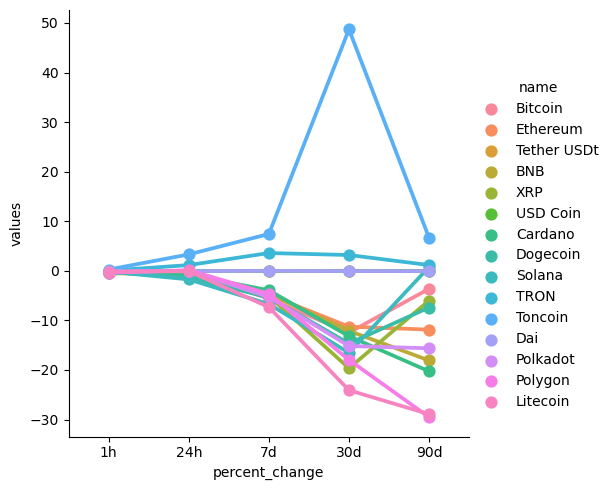

In [50]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df76, kind = 'point')

In [58]:
df10 = df72[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,25700.88226,2023-09-07 13:08:59.775022
15,Bitcoin,25700.16425,2023-09-07 13:10:02.050151
30,Bitcoin,25703.97672,2023-09-07 13:11:04.115753
45,Bitcoin,25699.61246,2023-09-07 13:12:06.089535


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

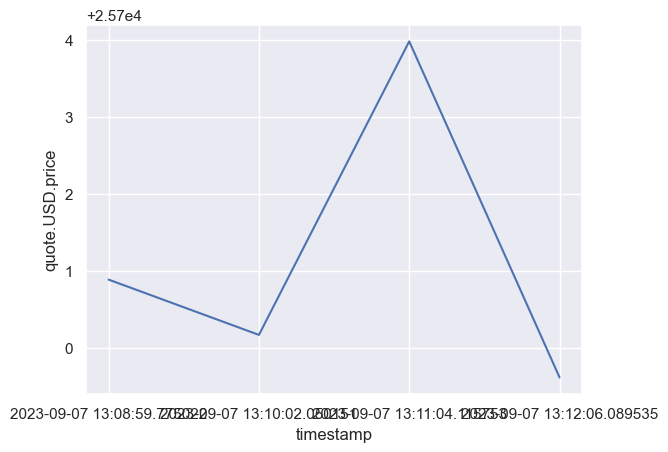

In [62]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)